In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N5.jpg
/kaggle/input/brain-mri-images-for-b

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [15]:
import os 
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image

In [16]:
pwd

'/kaggle/working'

In [19]:
!ls /kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset

no  yes


In [20]:
!ls /kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no

'1 no.jpeg'  '26 no.jpg'  '41 no.jpg'	 N15.jpg    No16.jpg	 'no 89.jpg'
'10 no.jpg'  '27 no.jpg'  '42 no.jpg'	 N16.jpg    No17.jpg	 'no 9.png'
'11 no.jpg'  '28 no.jpg'  '43 no.jpg'	 N17.jpg    No18.jpg	 'no 90.jpg'
'12 no.jpg'  '29 no.jpg'   44no.jpg	 N19.JPG    No19.jpg	 'no 91.jpeg'
'13 no.jpg'  '3 no.jpg'   '45 no.jpg'	 N2.JPG     No20.jpg	 'no 92.jpg'
'14 no.jpg'  '30 no.jpg'  '46 no.jpg'	 N20.JPG    No21.jpg	 'no 923.jpg'
'15 no.jpg'  '31 no.jpg'  '47 no.jpg'	 N21.jpg    No22.jpg	 'no 94.jpg'
'17 no.jpg'  '32 no.jpg'  '48 no.jpeg'	 N22.JPG   'no 1.jpg'	 'no 95.jpg'
'18 no.jpg'  '33 no.jpg'  '49 no.jpg'	 N26.JPG   'no 10.jpg'	 'no 96.jpg'
'19 no.jpg'  '34 no.jpg'  '5 no.jpg'	 N3.jpg    'no 100.jpg'  'no 97.jpg'
'2 no.jpeg'  '35 no.jpg'  '50 no.jpg'	 N5.jpg    'no 2.jpg'	 'no 98.jpg'
'20 no.jpg'  '36 no.jpg'  '6 no.jpg'	 N6.jpg    'no 3.jpg'	 'no 99.jpg'
'21 no.jpg'  '37 no.jpg'  '7 no.jpg'	 No11.jpg  'no 4.jpg'	  no.jpg
'22 no.jpg'  '38 no.jpg'  '8 no.jpg'	 No12.jpg  'no 5.jpeg'
'2

In [21]:
!ls /kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes

Y1.jpg	  Y12.jpg   Y164.JPG  Y193.JPG	Y252.jpg  Y37.jpg  Y59.JPG  Y81.jpg
Y10.jpg   Y120.JPG  Y165.JPG  Y194.jpg	Y253.JPG  Y38.jpg  Y6.jpg   Y82.jpg
Y100.JPG  Y13.jpg   Y166.JPG  Y195.JPG	Y254.jpg  Y39.jpg  Y60.jpg  Y85.JPG
Y101.jpg  Y14.jpg   Y167.JPG  Y2.jpg	Y255.JPG  Y4.jpg   Y61.jpg  Y86.JPG
Y102.jpg  Y146.JPG  Y168.jpg  Y20.jpg	Y256.JPG  Y40.JPG  Y62.jpg  Y89.JPG
Y103.jpg  Y147.JPG  Y169.jpg  Y21.jpg	Y257.jpg  Y41.jpg  Y65.JPG  Y9.jpg
Y104.jpg  Y148.JPG  Y17.jpg   Y22.jpg	Y258.JPG  Y42.jpg  Y66.JPG  Y90.jpg
Y105.jpg  Y15.jpg   Y170.JPG  Y23.JPG	Y259.JPG  Y44.JPG  Y67.JPG  Y91.jpg
Y106.jpg  Y153.jpg  Y18.JPG   Y24.jpg	Y26.jpg   Y45.JPG  Y69.jpg  Y92.jpg
Y107.jpg  Y154.jpg  Y180.jpg  Y242.JPG	Y27.jpg   Y46.jpg  Y7.jpg   Y92.png
Y108.jpg  Y155.JPG  Y181.jpg  Y243.JPG	Y28.jpg   Y47.JPG  Y70.jpg  Y95.jpg
Y109.JPG  Y156.JPG  Y182.JPG  Y244.JPG	Y29.jpg   Y49.JPG  Y71.JPG  Y96.jpg
Y11.jpg   Y157.JPG  Y183.jpg  Y245.jpg	Y3.jpg	  Y50.JPG  Y73.jpg  Y97.JPG
Y111.JPG  Y158.JPG  Y184.JPG  Y246.

In [22]:
full_path='/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset'

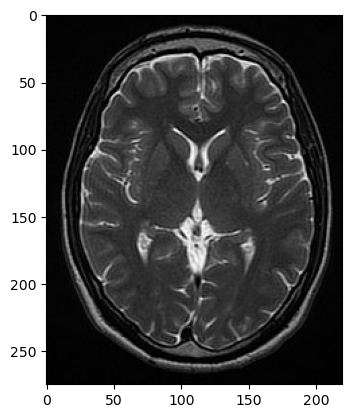

In [27]:
img = mpimg.imread(full_path+'/no/no 4.jpg')
plt.imshow(img,cmap='gray')

In [28]:
img

array([[3, 3, 3, ..., 1, 2, 2],
       [3, 3, 3, ..., 2, 2, 2],
       [3, 3, 3, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 2, 2, 3],
       [2, 2, 2, ..., 1, 2, 2]], dtype=uint8)

In [ ]:
img.shape

In [33]:
def view_random_image (path,target_class):
    folder = path+target_class
    random_imagen=random.sample(os.listdir(folder),1)
    img= mpimg.imread(folder+"/"+random_imagen[0])
    plt.imshow(img)
    plt.title(target_class)
    print(img.shape)
    return img

(540, 504, 3)


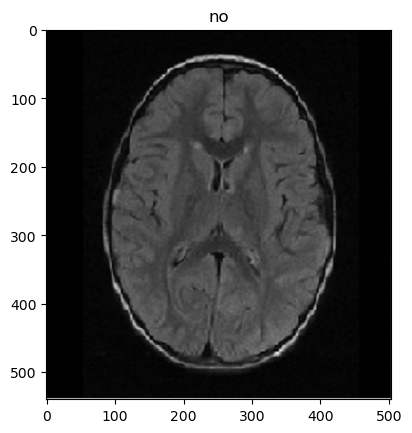

In [36]:
img_no = view_random_image(full_path+'/','no')

In [37]:
generator = ImageDataGenerator(rescale=1./255,
                              validation_split=0.8,
                              horizontal_flip=True,
                              vertical_flip=True,
                              zoom_range=0.06,
                              rotation_range=5)

In [39]:
train_data = generator.flow_from_directory(full_path,batch_size=32,target_size=(250,250),
                                          class_mode='binary',seed=55)
test_data = generator.flow_from_directory(full_path,batch_size=32,target_size=(250,250),
                                          class_mode='binary',seed=55)

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [46]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(250,250,3),
                         kernel_size=3,
                         activation='relu',
                         filters=64),
    tf.keras.layers.Conv2D(32,kernel_size=3,
                         activation='relu'),
    tf.keras.layers.MaxPool2D(2,padding='valid'),
    
    tf.keras.layers.Conv2D(kernel_size=3,
                         activation='relu',
                         filters=32),
    tf.keras.layers.Conv2D(32,kernel_size=3,
                         activation='relu'),
    tf.keras.layers.MaxPool2D(2,padding='valid'),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(256,activation=tf.nn.tanh),
    tf.keras.layers.Dense(256,activation=tf.nn.relu),
    tf.keras.layers.Dense(256,activation=tf.nn.relu),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(128,activation=tf.nn.tanh),
    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

In [49]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

In [54]:
direc = os.path.dirname('dataHistoria')
cp_callback=tf.keras.callbacks.ModelCheckpoint(filepath=direc,save_weights_only=True,verbose=1)

In [ ]:
model.fit(train_data,
           epochs=50,
           steps_per_epoch=len(train_data),
           validation_data=test_data,
           #callbacks=[cp_callback]
          )

Epoch 1/50
8/8 [==============================] - 73s 9s/step - loss: 0.6908 - accuracy: 0.5652 - val_loss: 0.6866 - val_accuracy: 0.6126
Epoch 2/50
8/8 [==============================] - 69s 9s/step - loss: 0.6837 - accuracy: 0.6126 - val_loss: 0.6785 - val_accuracy: 0.6126
Epoch 3/50
8/8 [==============================] - 70s 9s/step - loss: 0.6747 - accuracy: 0.6126 - val_loss: 0.6682 - val_accuracy: 0.6126
Epoch 4/50
8/8 [==============================] - 70s 9s/step - loss: 0.6633 - accuracy: 0.6126 - val_loss: 0.6548 - val_accuracy: 0.6126
Epoch 5/50
8/8 [==============================] - 69s 9s/step - loss: 0.6492 - accuracy: 0.6126 - val_loss: 0.6393 - val_accuracy: 0.6126


In [ ]:
model.evaluate(test_data)